In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
plt.style.use("seaborn-notebook")

In [2]:
#  Import and read the data
postcovid_df = pd.read_csv("Resources/whr_2021.csv")
postcovid_df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


/Users/cristinacodispoti/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



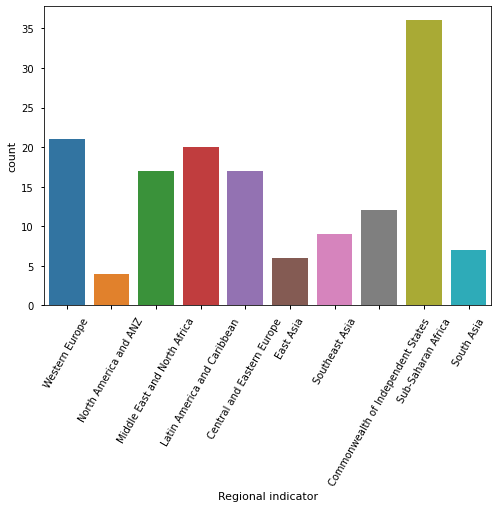

In [3]:
sns.countplot(postcovid_df["Regional indicator"])
plt.xticks(rotation = 60)
plt.show()

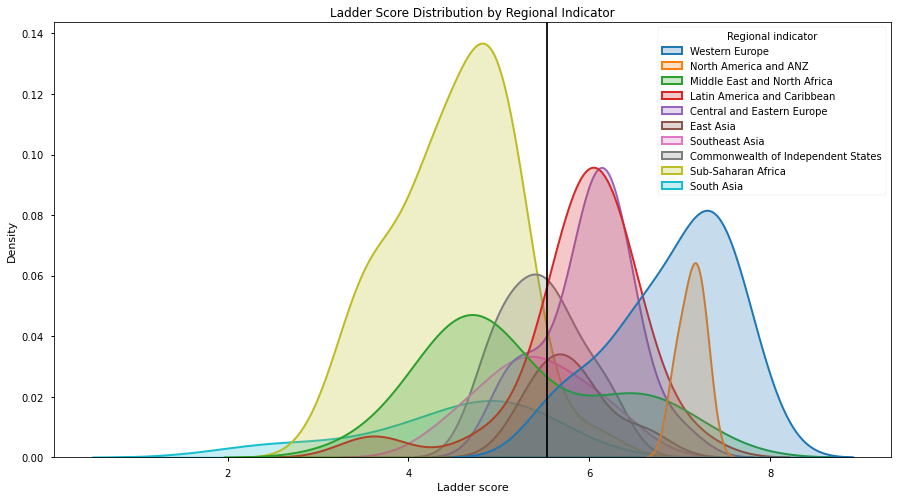

In [4]:
plt.figure(figsize = (15,8))
sns.kdeplot(postcovid_df["Ladder score"], hue = postcovid_df["Regional indicator"], fill = True, linewidth = 2)
plt.axvline(postcovid_df["Ladder score"].mean(), c = "black")
plt.title("Ladder Score Distribution by Regional Indicator")
plt.savefig('2021_score_region_dist.png') 
plt.show()

In [5]:
postcovid_df = postcovid_df.drop(columns =['Regional indicator',
                                           'Standard error of ladder score',
                                           'lowerwhisker',
                                           'upperwhisker',
                                           'Social support',
                                           'Healthy life expectancy',
                                           'Freedom to make life choices',
                                           'Logged GDP per capita',
                                           'Generosity',
                                           'Perceptions of corruption',
                                           'Ladder score in Dystopia',
                                           'Dystopia + residual']
                                )                  

In [6]:
postcovid_df.head()

,Country name,Ladder score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7.842,1.446,1.106,0.741,0.691,0.124,0.481
1,Denmark,7.620,1.502,1.108,0.763,0.686,0.208,0.485
2,Switzerland,7.571,1.566,1.079,0.816,0.653,0.204,0.413
3,Iceland,7.554,1.482,1.172,0.772,0.698,0.293,0.170
4,Netherlands,7.464,1.501,1.079,0.753,0.647,0.302,0.384


In [7]:
postcovid_df = postcovid_df.rename(columns={'Explained by: Log GDP per capita': 'Logged GDP per capita', 
                                  'Explained by: Social support': 'Social support',
                                 'Explained by: Healthy life expectancy': 'Healthy life expectancy',
                                 'Explained by: Freedom to make life choices': 'Freedom to make life choices',
                                 'Explained by: Generosity': 'Generosity',
                                 'Explained by: Perceptions of corruption': 'Perceptions of corruption'})

In [8]:
postcovid_df.head()

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.842,1.446,1.106,0.741,0.691,0.124,0.481
1,Denmark,7.620,1.502,1.108,0.763,0.686,0.208,0.485
2,Switzerland,7.571,1.566,1.079,0.816,0.653,0.204,0.413
3,Iceland,7.554,1.482,1.172,0.772,0.698,0.293,0.170
4,Netherlands,7.464,1.501,1.079,0.753,0.647,0.302,0.384


In [9]:
column = postcovid_df["Ladder score"]
max_value = column.max()
print(max_value)

7.842


In [10]:
max = postcovid_df.loc[(postcovid_df["Ladder score"] == max_value)]
max

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.842,1.446,1.106,0.741,0.691,0.124,0.481


In [11]:
print(f"The happiest country in the world is: {(max['Country name']).to_string(index=False)}, with a Score of:{max_value}")

The happiest country in the world is: Finland, with a Score of:7.842


In [12]:
column1 = postcovid_df["Logged GDP per capita"]
max_value = column1.max()
print(max_value)

1.751


In [13]:
max = postcovid_df.loc[(postcovid_df["Logged GDP per capita"] == max_value)]
max

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
7,Luxembourg,7.324,1.751,1.003,0.76,0.639,0.166,0.353


In [14]:
print(f"The country where GDP per capita influences happiness the most is: {(max['Country name']).to_string(index=False)}, with a Score of:{max_value}")

The country where GDP per capita influences happiness the most is: Luxembourg, with a Score of:1.751


In [15]:
column2 = postcovid_df["Social support"]
max_value = column2.max()
print(max_value)

1.172


In [16]:
max = postcovid_df.loc[(postcovid_df["Social support"] == max_value)]
max

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
3,Iceland,7.554,1.482,1.172,0.772,0.698,0.293,0.170
96,Turkmenistan,5.066,1.046,1.172,0.439,0.602,0.366,0.033


In [17]:
print(f"The countries where social support influences happiness the most is: {(max['Country name']).to_string(index=False)}, with a Score of:{max_value}")

The countries where social support influences happiness the most is:      Iceland
Turkmenistan, with a Score of:1.172


In [18]:
column3 = postcovid_df["Healthy life expectancy"]
max_value = column3.max()
print(max_value)

0.897


In [19]:
max = postcovid_df.loc[(postcovid_df["Healthy life expectancy"] == max_value)]
max

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
31,Singapore,6.377,1.695,1.019,0.897,0.664,0.176,0.547


In [20]:
print(f"The country where healthy life expectancy influences happiness the most is: {(max['Country name']).to_string(index=False)}, with a Score of:{max_value}")

The country where healthy life expectancy influences happiness the most is: Singapore, with a Score of:0.897


In [21]:
column4 = postcovid_df["Freedom to make life choices"]
max_value = column4.max()
print(max_value)

0.716


In [22]:
max = postcovid_df.loc[(postcovid_df["Freedom to make life choices"] == max_value)]
max

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
41,Uzbekistan,6.179,0.769,1.027,0.528,0.716,0.391,0.271


In [23]:
print(f"The country where freedom to make life choices influences happiness the most is: {(max['Country name']).to_string(index=False)}, with a Score of:{max_value}")

The country where freedom to make life choices influences happiness the most is: Uzbekistan, with a Score of:0.716


In [24]:
column5 = postcovid_df["Generosity"]
max_value = column5.max()
print(max_value)

0.541


In [25]:
max = postcovid_df.loc[(postcovid_df["Generosity"] == max_value)]
max

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
81,Indonesia,5.345,0.954,0.786,0.433,0.598,0.541,0.046


In [26]:
print(f"The country where generosity influences happiness the most is: {(max['Country name']).to_string(index=False)}, with a Score of:{max_value}")

The country where generosity influences happiness the most is: Indonesia, with a Score of:0.541


In [27]:
column6 = postcovid_df["Perceptions of corruption"]
max_value = column6.max()
print(max_value)

0.547


In [28]:
max = postcovid_df.loc[(postcovid_df["Perceptions of corruption"] == max_value)]
max

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
31,Singapore,6.377,1.695,1.019,0.897,0.664,0.176,0.547


In [29]:
print(f"The country where perceptions of corruption influences happiness the most is: {(max['Country name']).to_string(index=False)}, with a Score of:{max_value}")

The country where perceptions of corruption influences happiness the most is: Singapore, with a Score of:0.547


In [30]:
#postcovid_df.to_csv('Resources/clean_whr_2021.csv', index=False)

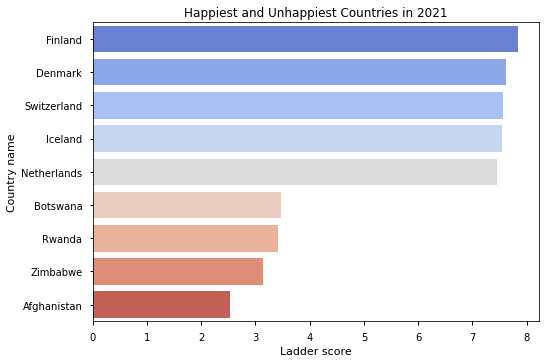

In [31]:
df2021_happiest_unhappiest = postcovid_df[(postcovid_df.loc[:, "Ladder score"] > 7.4) | (postcovid_df.loc[:, "Ladder score"] < 3.5)]
sns.barplot(x = "Ladder score", y = "Country name", data=df2021_happiest_unhappiest, palette = "coolwarm")
plt.title("Happiest and Unhappiest Countries in 2021")
plt.savefig('2021_happy_unhappy.png') 
plt.show()

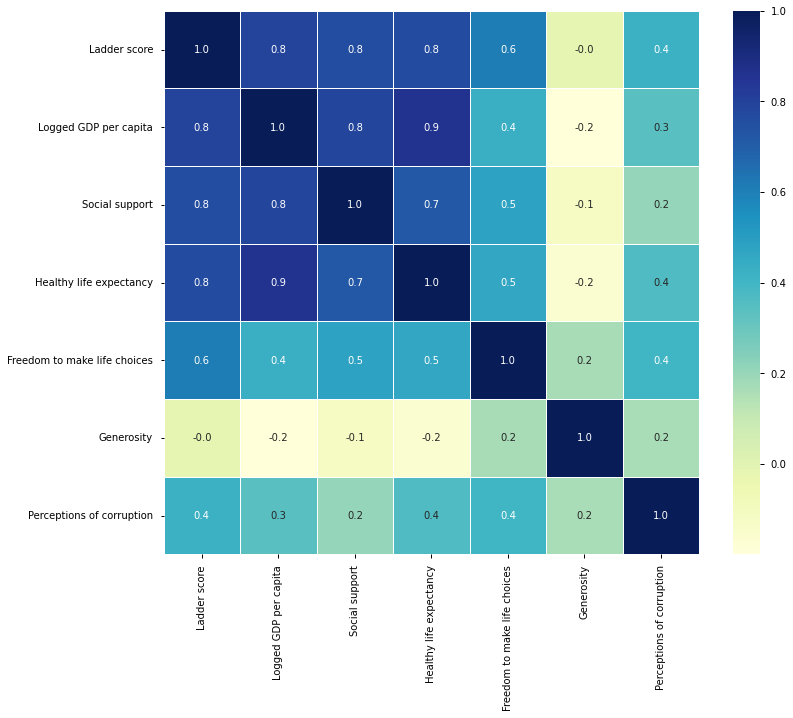

In [32]:
#Correlation Map

list1=["Ladder score","Logged GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"]
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(postcovid_df[list1].corr(), annot=True, cmap="YlGnBu", linewidths=.5, fmt= '.1f',ax=ax)
plt.savefig('2021_correlation.png') 
plt.show()